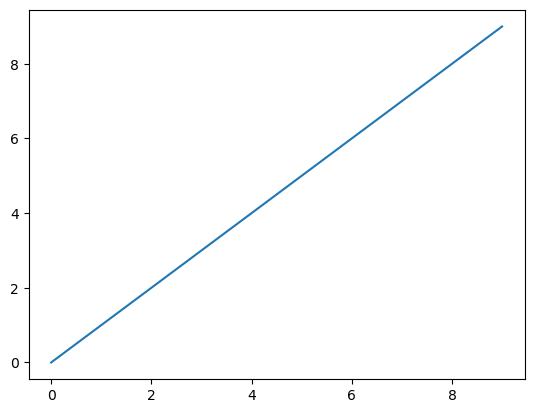

In [4]:
#package imports
#If using Jupyter locally, make sure you have pip installed saphires and any dependencies you need.
#You should have done this as part of our last lab
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg') #comment this line out if using colab
import numpy as np
import os
from scipy.optimize import curve_fit
#from matplotlib.backends.backend_pdf import PdfPages



%matplotlib inline
import pickle as pkl
from scipy.ndimage import gaussian_filter
import astropy
import saphires as saph #if using colab comment out this line.

x = [0,1,2,3,4,5,6,7,8,9]
y = x
plt.plot(x, y)    #Testing out matplotlib inline to make sure this runs
print()
import random

C:/Users/Jonah/Astro/Stars/DATA/table1.dat
17
Data length:  1895

periods length:  1714
RS length:  1271
SSG length:  443
Extra length:  9

TESS RS length:  840
TESS SSGs length:  239
TESS Total length:  1079

['1', '1', '2', '1', '2', '0', '2', '1', '1']
[189, 411, 421, 475, 804, 875, 1178, 1660, 1778]
['RS', 'RS', 'RS', 'SSG', 'SSG', 'SSG', 'RS', 'SSG', 'SSG']
1714


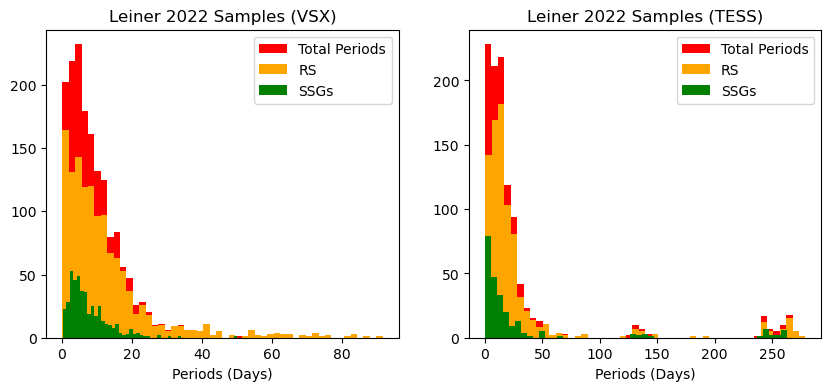

In [5]:
#Adding star values from RSCVn range

file = 'table1.dat'
import os
import glob
folder_path = 'C:/Users/Jonah/Astro/Stars/DATA/' + file  # Change this to the path of your folder

print(folder_path)

#.dat file extraction, checks .p


def is_float(string):
    #True if given string is float else False
    try:
        return float(string)
    except ValueError:
        return False

stardata = []
with open(folder_path, 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split("     ")
        stardata.append([float(i) if is_float(i) else i for i in k])
stardata = np.array(stardata, dtype='O')



# Read a plain text .dat file
data = []
with open(folder_path, 'r') as file:
    for line in file:
        columns = line.split()  # Splits by any whitespace
        #print(len(columns))
        if len(columns) == 18:
            combined_element = columns[1] + ' ' + columns[2]
            new_array = [columns[0], combined_element] + columns[3:]
            #print(new_array)
            #print(len(new_array))
            data.append(new_array)
            #print()
        else:
            #print(columns)
            data.append(columns)
            #print()
#print(float(data[1][12]))
print(len(data[0]))
print("Data length: ", len(data))
#for i in range(len(data)):
    #print(data[i])
periods = []
RSsP = []
SSGsP = []
extra = []
test = []
extraind = []
extraid = []

TessRS = []
TessSSGs = []
Tessperiods = []
for i in range(len(data)):
    
    if data[i][16] == 'RS':
        RSsP.append(data[i][11])
        periods.append(data[i][11])
        if float(data[i][12]) != -999:
            TessRS.append(data[i][12])
            Tessperiods.append(data[i][12])
    elif data[i][16] == 'SSG':
        SSGsP.append(data[i][11])
        test.append(data[i][16])
        periods.append(data[i][11])
        if float(data[i][12]) != -999:
            TessSSGs.append(data[i][12])
            Tessperiods.append(data[i][12])
    elif data[i][16] != 'cut':
        extra.append(data[i][16])
        extraind.append(i)
        extraid.append(data[i][len(data[i])-1])
        #periods.append(data[i][11])
print()
print("periods length: ", len(periods))
print("RS length: ", len(RSsP))
print("SSG length: ", len(SSGsP))
print("Extra length: ", len(extra))
print()
print("TESS RS length: ", len(TessRS))
print("TESS SSGs length: ", len(TessSSGs))
print("TESS Total length: ", len(Tessperiods))
print()
print(extra)
print(extraind)
print(extraid)
periods = [float(item) for item in periods]
SSGsP = [float(item) for item in SSGsP]
RSsP = [float(item) for item in RSsP]
print(len(periods))
#print(periods)
#print(periods)

Tessperiods = [float(item) for item in Tessperiods]
TessSSGs = [float(item) for item in TessSSGs]
TessRS = [float(item) for item in TessRS]




fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(121)



ax1.hist(periods, 50, color = 'r', label = "Total Periods")
ax1.hist(RSsP, 50, color = 'orange', label = "RS")#, density = True)
ax1.hist(SSGsP, 50, color = 'g', label = "SSGs")#, density = True)
ax1.set_title("Leiner 2022 Samples (VSX)")
ax1.set_xlabel("Periods (Days)")
#ax1.set_xlim(right = 50)
plt.legend()


ax2 = fig.add_subplot(122)
ax2.hist(Tessperiods, 50, color = 'r', label = "Total Periods")
ax2.hist(TessRS, 50, color = 'orange', label = "RS")#, density = True)
ax2.hist(TessSSGs, 50, color = 'g', label = "SSGs")#, density = True)
ax2.set_title("Leiner 2022 Samples (TESS)")
ax2.set_xlabel("Periods (Days)")
#ax2.set_xlim(right = 50)
plt.legend()
plt.show()




periods = SSGsP
Tessperiods = TessSSGs

55
Total Stars in our SSG sample:  55
Ux =  4.8
Ox =  2.3
Sigma input:  0.4546311450117938
Mu input: 1.77530539592858
------------------------------

------------------------------


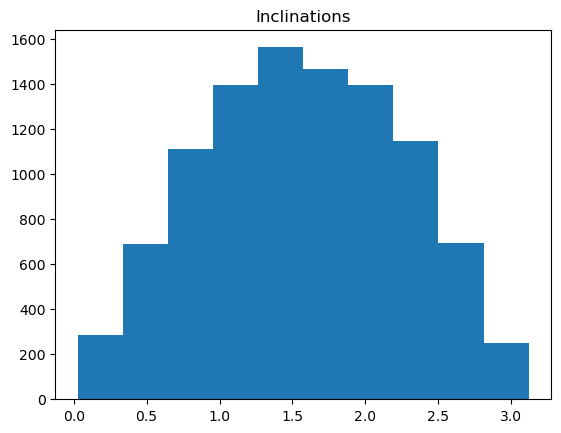


Max logP, limited range = 1.4999932393967763
Max logP, full range = 27.963937173555017


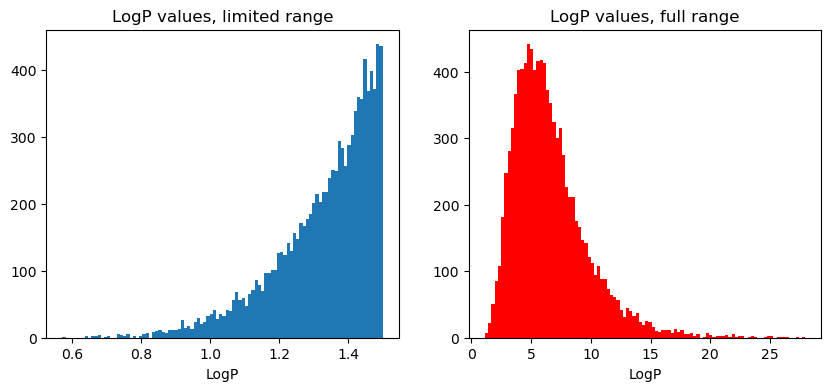

---------------


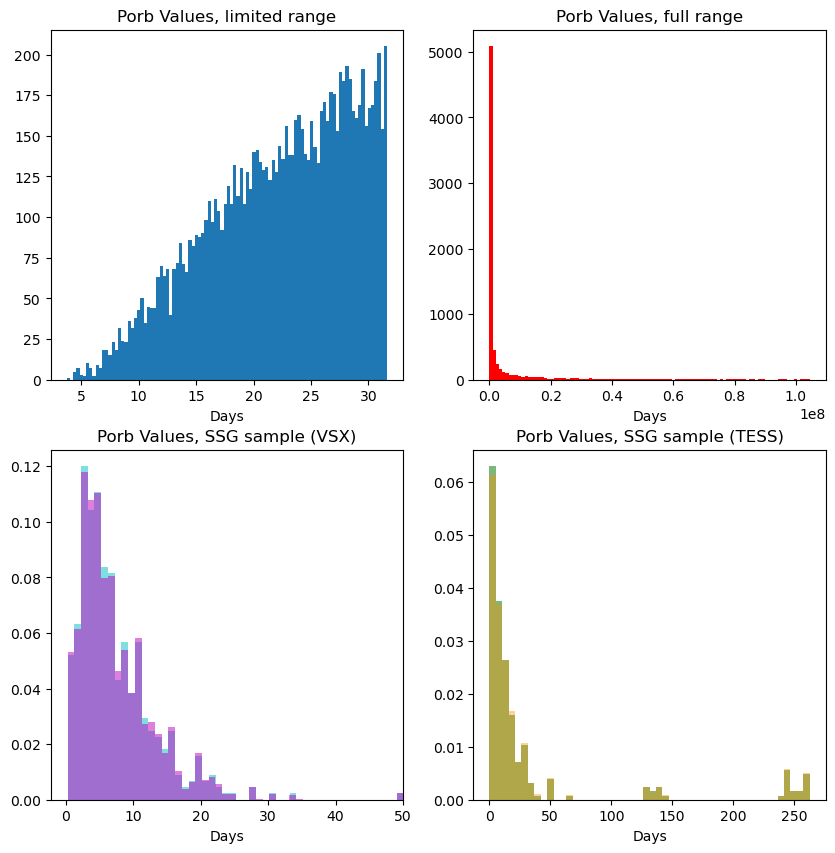

Mean Kvals, limited range = 26.547762814304424 km/s
Mean Kvals, full range = 2.0553238136966794 km/s
Mean SSGs (VSX) range = 42.950886867344906 km/s
Mean SSGs (TESS) range = 37.250017759843395 km/s

Mode (Limited Range):  21.0
Mode (Full Range):  0.0
Mode (VSX):  35.0
Mode (TESS): 12.0
-------------------



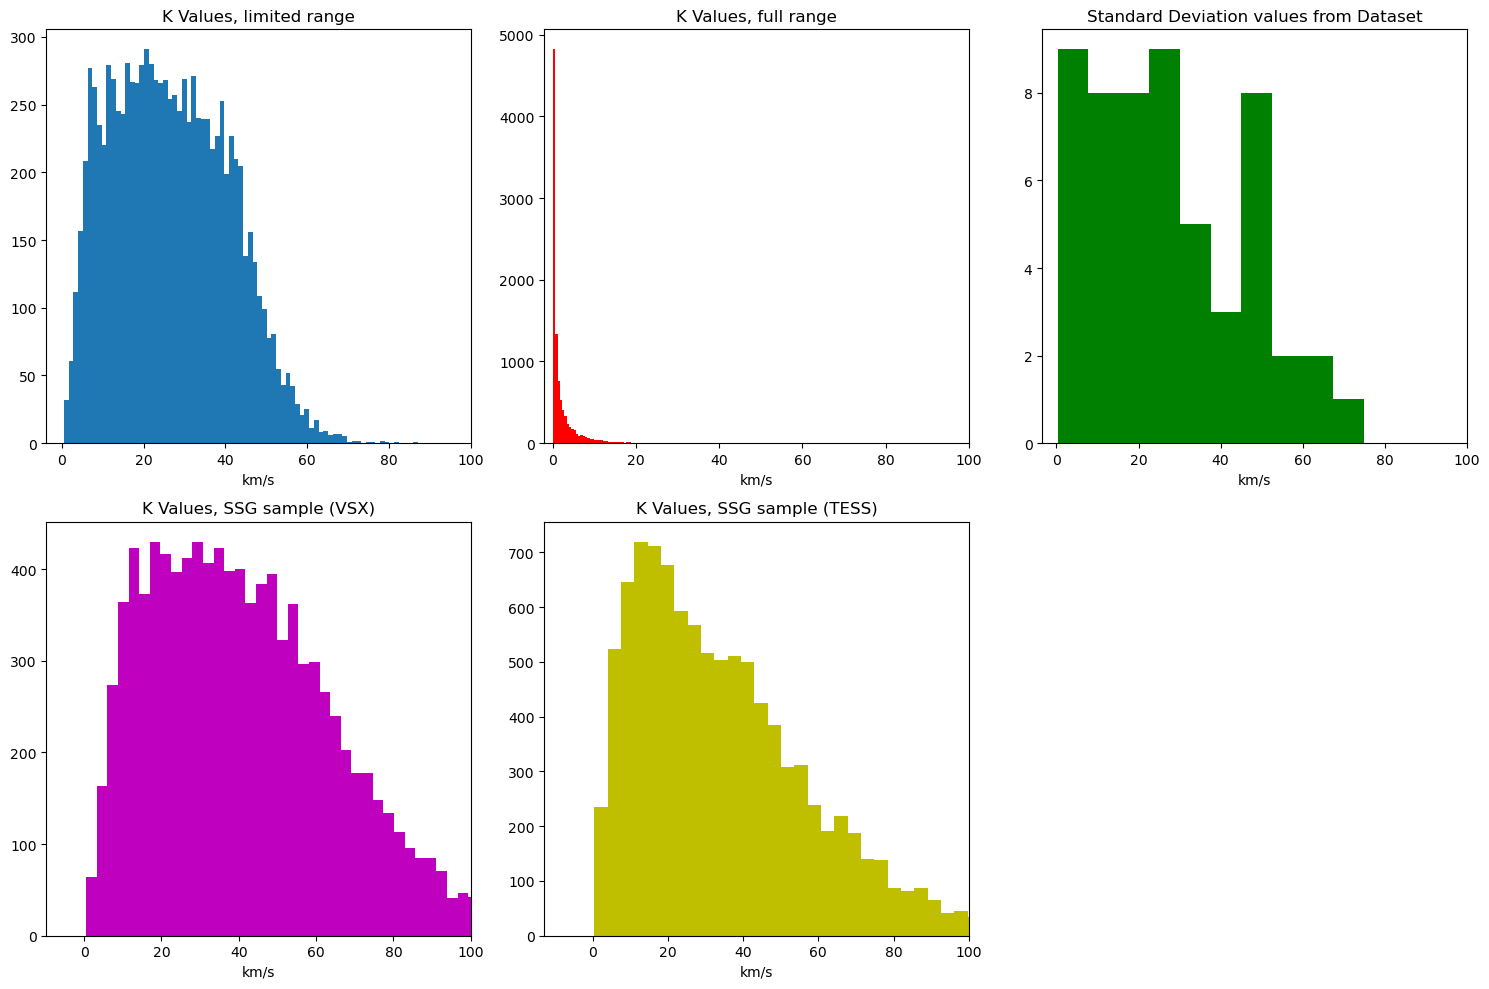


-----------------

CDF Intersection (limited range) = 0.9894569521025304 (km/s)
CDF Intersection (full range) = 0.9996810494828634 (km/s)
CDF Intersection (STD Data Fit) = 0.9850000000000003 (km/s)
CDF Intersection (Leiner SSGs, VSX) = 0.6787052109971734 (km/s)
CDF Intersection (Leiner SSGs, TESS) = 0.9994246738131433 (km/s)

Percentage (limited range) = 0.1000100010001 %
Percentage (full range) = 59.70597059705971 %
Percentage (STD Data Fit) = 5.566212871076537 %
Percentage (Leiner SSGs, VSX) = 0.020002000200020003 %
Percentage (Leiner SSGs, TESS) = 0.15001500150015 %



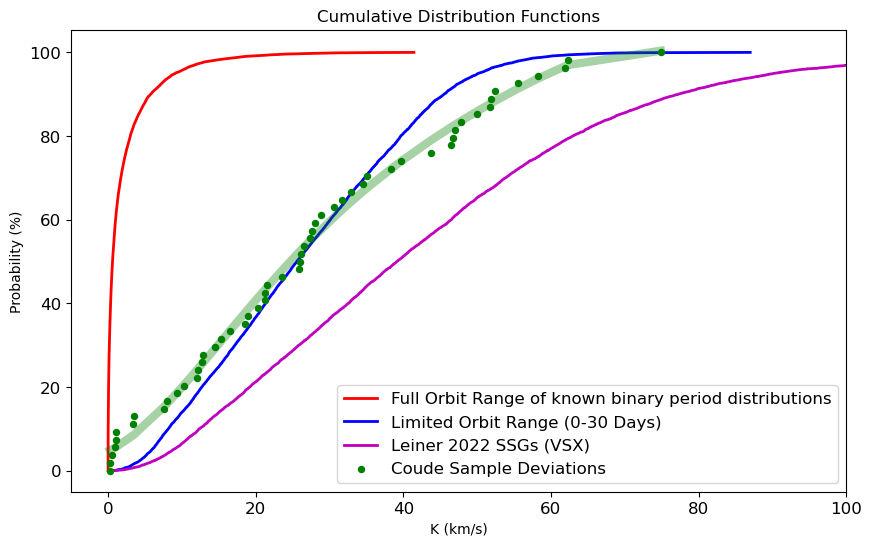

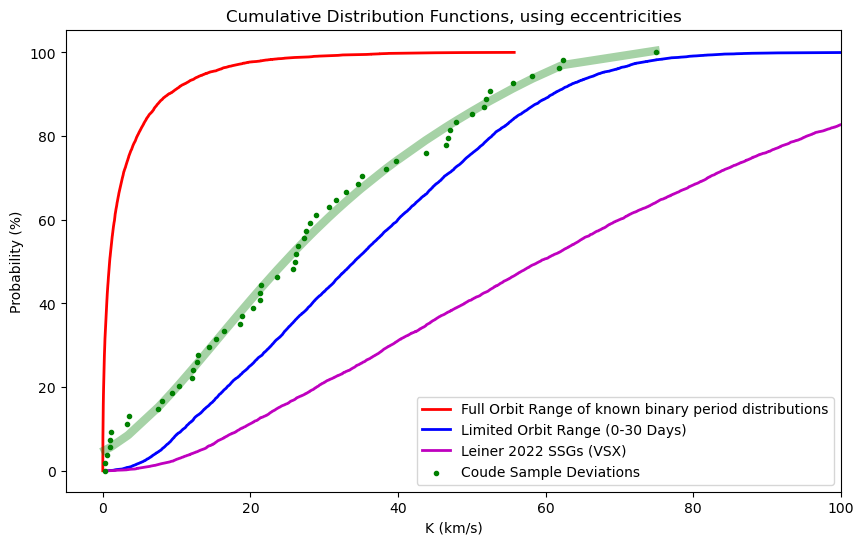

In [7]:
# Constants
Msol = 1.9891 * 10**30 #kg
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
STDs = [0.7172558818,10.93467192,3.072360656,33.28903151,37.61322968,21.65769403,25.19598462,0.9691577099,7.864160762,16.53716545,30.58245997,
        7.625,23.96603476,28.82890818,2.815509076,11.33186234,14.62754952,55.84383654,13.28649366,0.5035330795,15.64765957,
        12.75274976,36.03181967,21.27259084,0.2913434399,0.1774711244,14.6519686,0.2052437575,24.65290853,50.53496427,19.94097518,21.24094984,
        16.48916614, 9.677463304,5.668274517,37.19917953,6.783661745,40.30519617,19.51416836,56.54055614,17.37941702,30.63141851,10.68282622,
        20.16946689,9.773317809,27.42333211,8.149381708,33.43136415,34.49558586,41.15574185,25.40926357,32.8312812,22.36667991,7.89183274,
        0.7050925865,13.10217539]

amps = [0.9850000000000003, 12.76, 3.4899999999999984,47.065, 55.515, 28.86, 34.535, 1.1100000000000012, 12.155000000000001, 
        26.020000000000003, 49.955, 31.655, 43.735, 3.335000000000001, 14.43, 23.58, 74.89, 21.265, 21.265, 20.34, 21.5, 46.72, 
        27.32, 0.504999999999999, 0.27500000000000036, 18.595, 0.27000000000000046, 39.67, 61.86, 32.93, 27.565, 18.915, 12.08, 
        7.54, 51.705, 7.985000000000001, 58.185, 25.81, 62.315, 26.490000000000002, 35.105, 15.275, 26.19, 12.915, 38.31, 9.4, 
        52.47, 46.435, 51.935, 28.075, 47.86, 30.625, 10.285, 1.0350000000000001, 16.474999999999998]

print(len(amps))
STDs = amps

print("Total Stars in our SSG sample: ", len(STDs))
#Porb = 5 * 86400  #will need to take this out
######
ux = 4.8
ox = 2.3
mode = 4.8

u = np.log( (ux**2) / np.sqrt(ux**2 + ox**2))
o = np.sqrt( np.log(1 + (ox**2 / ux**2)))
#print(u)
um = np.log(mode) + o**2

print("Ux = ", ux)
print("Ox = ", ox)
print("Sigma input: ", o)

print("Mu input:", um)
print("------------------------------")
print()
#########
m1s = []
m2s = []
incs = []
Kvals = []
Kvalsfull = []
logPvals = []
Porbs = []
logPfullvals = []
Porbsfull = []
Kvals3 = []
randPvals = []
Kvals4 = []
randPvals2 = []
incvals = []
ec = []
ec2 = []
ec3 = []
ec4 = []
Kvalse = []
Kvalsfulle = []
Kvals3e = []
Kvals4e = []
eccens = []
for i in range(10000):
    
    m1 = random.uniform(0.9, 2)
    m2 = random.uniform(0.1, m1)
    v = random.uniform(0,1)
    inclination = np.arccos(2 * v - 1)
    


    
    m1s.append(m1)
    m2s.append(m2)
    incs.append(inclination)
    #print("M1 = ", m1, " Msol")
    #print("M2 = ", m2, " Msol")
    #print("i = ", inclination, "Degrees")
    M1 = m1 * Msol
    M2 = m2 * Msol
    incvals.append(inclination)
    #incl = np.deg2rad(inclination)
    incl = inclination
    
        ###
        #Lognormal pull here
            #get Porb
    def lognormal(mean, sigma, range):
        while True:
            logP = np.random.lognormal(mean, sigma)
            if logP>0 and logP < range:
                break
        return logP

    logP = lognormal(um, o, 1.5)
    logPfull = lognormal(um, o, 30)

    #Eccentricities
    if logP < 1:
        e = 0
    elif logP > 1 and logP < 2:
        e = 0.2 + random.uniform(-0.2, 0.2)
    elif logP > 2:
        e = 0.4 + random.uniform(-0.2, 0.2)
        
    
    
    if logPfull < 1:
        e2 = 0
    elif logPfull > 1 and logPfull < 2:
        e2 = 0.2 + random.uniform(-0.2, 0.2)
    elif logPfull > 2:
        e2 = 0.4 + random.uniform(-0.2, 0.2)
        
    eccens.append(e2)
    
    logPvals.append(logP)
    logPfullvals.append(logPfull)
    
    Porb = 10 ** logP  * 86400
    Porbs.append(Porb/86400)
    Porb2 = 10 ** logPfull * 86400
    Porbsfull.append(Porb2/86400)
    ec.append(e)
    ec2.append(e2)
    
    K = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb * (M1 + M2)**2)  )**(1/3)
    Ke = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb * (M1 + M2)**2  * (1-e**2)**3/2)  )**(1/3)
    Kvals.append(K/1000)
    Kvalse.append(Ke/1000)

    K2 = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb2 * (M1 + M2)**2))**(1/3)
    K2e = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb2 * (M1 + M2)**2  * (1-e2**2)**3/2)  )**(1/3)
    Kvalsfull.append(K2/1000)
    Kvalsfulle.append(K2e/1000)

    
    ##########################
    hist_counts, bins = np.histogram(periods, bins=50, density=True)
    
    # Compute the PDF
    pdfdata = hist_counts / sum(hist_counts)
    
    # Compute the CDF
    cdfdata = np.cumsum(pdfdata)
    cdfdata = np.insert(cdfdata, 0, 0)  # Insert 0 at the beginning for the first bin edge
    
    # Generate a uniform random number
    uniform_random_value = np.random.rand()
    
    # Map the uniform random number to the histogram distribution
    PorbRand = np.interp(uniform_random_value, cdfdata, bins)
    randPvals.append(PorbRand)
    #print(f"Random value drawn from the histogram distribution: {random_value}")

    ##########################
    ##########################
    hist_counts2, bins2 = np.histogram(Tessperiods, bins=50, density=True)
    
    # Compute the PDF
    pdfdata2 = hist_counts2 / sum(hist_counts2)
    
    # Compute the CDF
    cdfdata2 = np.cumsum(pdfdata2)
    cdfdata2 = np.insert(cdfdata2, 0, 0)  # Insert 0 at the beginning for the first bin edge
    
    # Generate a uniform random number
    uniform_random_value2 = np.random.rand()
    
    # Map the uniform random number to the histogram distribution
    PorbRand2 = np.interp(uniform_random_value2, cdfdata2, bins2)
    randPvals2.append(PorbRand2)
    #print(f"Random value drawn from the histogram distribution: {random_value}")

    ##########################
    if 10**PorbRand < 10:
        e3 = 0
    elif 10**PorbRand > 10 and 10**PorbRand < 100:
        e3 = 0.2 + random.uniform(-0.2, 0.2)
    elif 10**PorbRand > 100:
        e3 = 0.4 + random.uniform(-0.2, 0.2)
    
    if 10**PorbRand2 <10:
        e4 = 0
    elif 10**PorbRand2 > 10 and PorbRand2 < 100:
        e4 = 0.2 + random.uniform(-0.2, 0.2)
    elif 10**PorbRand2 > 100:
        e4 = 0.4 + random.uniform(-0.2, 0.2)
    ec3.append(e3)
    ec4.append(e4)

    
    K3 = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (PorbRand*86400 * (M1 + M2)**2)  )**(1/3)
    K3e = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (PorbRand*86400 * (M1 + M2)**2  * (1-e3**2)**3/2)  )**(1/3)
    Kvals3.append(K3/1000)
    Kvals3e.append(K3e/1000)
    #print("logP = ", logP)
    #print("Porb = ", Porb, "Days")
    #print("K = ", K/1000, "km/s")

    K4 =  (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (PorbRand2*86400 * (M1 + M2)**2)  )**(1/3)
    K4e =  (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (PorbRand2*86400 * (M1 + M2)**2  * (1-e4**2)**3/2)  )**(1/3)
    Kvals4.append(K4/1000)
    Kvals4e.append(K4e/1000)

    
    #print()


print("------------------------------")
plt.hist(incvals)
plt.title("Inclinations")
plt.show()
print()
print("Max logP, limited range =", np.max(logPvals))
print("Max logP, full range =", np.max(logPfullvals))
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(121)
ax1.hist(logPvals, 100)#, density = True)
ax1.set_title("LogP values, limited range")
ax1.set_xlabel("LogP")

ax2 = fig.add_subplot(122)
ax2.hist(logPfullvals, 100, color = 'r')#, density = True)
ax2.set_title("LogP values, full range")
ax2.set_xlabel("LogP")

plt.show()

print("---------------")

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(221)
ax1.hist(Porbs, 100)#, density = True)
ax1.set_title("Porb Values, limited range")
ax1.set_xlabel("Days")

full = []
Porbsfull = np.sort(Porbsfull)
for i in range(7500):
    full.append(Porbsfull[i])

ax2 = fig.add_subplot(222)
ax2.hist(full, 100, color = 'r')#, density = True)
ax2.set_title("Porb Values, full range")
ax2.set_xlabel("Days")
#ax2.set_xlim(left = -5)

ax3 = fig.add_subplot(223)
ax3.hist(periods, 50, alpha = 0.5, color = 'c', density = True)
ax3.hist(randPvals, 50, alpha = 0.5, color = 'm', density = True)
ax3.set_xlim(right = 50)
ax3.set_title("Porb Values, SSG sample (VSX)")
ax3.set_xlabel("Days")

ax4 = fig.add_subplot(224)
ax4.hist(Tessperiods, 50, alpha = 0.6, color = 'forestgreen', density = True)
ax4.hist(randPvals2, 50, alpha = 0.4, color = 'darkorange', density = True)
#ax4.set_xlim(right = 50)
ax4.set_title("Porb Values, SSG sample (TESS)")
ax4.set_xlabel("Days")

plt.show()

print("Mean Kvals, limited range =", np.mean(Kvals), "km/s")
print("Mean Kvals, full range =", np.mean(Kvalsfull), "km/s")
print("Mean SSGs (VSX) range =", np.mean(Kvals3), "km/s")
print("Mean SSGs (TESS) range =", np.mean(Kvals4), "km/s")
print()

ks = []
for i in range(len(Kvals)):
    ks.append(np.round(Kvals[i], 0))
from scipy import stats
kmode = stats.mode(ks)
print("Mode (Limited Range): ", kmode[0])

ks2 = []
for i in range(len(Kvalsfull)):
    ks2.append(np.round(Kvalsfull[i], 0))
kmode2 = stats.mode(ks2)
print("Mode (Full Range): ", kmode2[0])

ks3 = []
for i in range(len(Kvals3)):
    ks3.append(np.round(Kvals3[i], 0))
kmode3 = stats.mode(ks3)
print("Mode (VSX): ", kmode3[0])

ks4 = []
for i in range(len(Kvals4)):
    ks4.append(np.round(Kvals4[i], 0))
kmode4 = stats.mode(ks4)
print("Mode (TESS):", kmode4[0])

print("-------------------")
print()






fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(231)
ax1.hist(Kvals, 75)#, density = True)
ax1.set_xlim(right = 100)
ax1.set_title("K Values, limited range")
ax1.set_xlabel("km/s")

ax2 = fig.add_subplot(232)
ax2.hist(Kvalsfull, 75, color = 'r')#, density = True)
ax2.set_xlim(right = 100)
ax2.set_title("K Values, full range")
ax2.set_xlabel("km/s")


ax3 = fig.add_subplot(234)
ax3.hist(Kvals3, 75, color = 'm')#, density = True)
ax3.set_xlim(right = 100)
ax3.set_title("K Values, SSG sample (VSX)")
ax3.set_xlabel("km/s")

ax4 = fig.add_subplot(235)
ax4.hist(Kvals4, 75, color = 'y')#, density = True)
ax4.set_xlim(right = 100)
ax4.set_title("K Values, SSG sample (TESS)")
ax4.set_xlabel("km/s")


ax5 = fig.add_subplot(233)
ax5.hist(STDs, 10, color = 'g')
ax5.set_xlim(right = 100)
ax5.set_title("Standard Deviation values from Dataset")
ax5.set_xlabel("km/s")

plt.tight_layout()
plt.show()


print()




data = np.sort(Kvals)
p = np.arange(len(Kvals)) / (len(Kvals) - 1)

data2 = np.sort(Kvalsfull)
p2 = np.arange(len(Kvalsfull)) / (len(Kvalsfull) - 1)






STDs = np.sort(STDs)
p3 = np.arange(len(STDs)) / (len(STDs) - 1)

coefficients = np.polyfit(STDs, p3, 5)
#print(coefficients)
best_fit_line = coefficients[0]*STDs**5 + coefficients[1] * STDs**4 + coefficients[2]*STDs**3 + coefficients[3]*STDs**2  + coefficients[4]*STDs + coefficients[5] 

SSGdata = np.sort(Kvals3)
pSSG = np.arange(len(Kvals3)) / (len(Kvals3) - 1)

TessSSGdata = np.sort(Kvals4)
TesspSSG = np.arange(len(Kvals4)) / (len(Kvals4) - 1)


slot1 = 0
slot2 = 0
slot3 = 0
for i in range(len(data)):
    if data[i]>1:
        slot1 = i
        break
for i in range(len(data2)):
    if data2[i]>1:
        slot2 = i
        break

for i in range(len(best_fit_line)):
    if STDs[i]>1:
        slot3 = i
        break

for i in range(len(SSGdata)):
    if SSGdata[i]>1:
        slot4 = i
        break

for i in range(len(TessSSGdata)):
    if TessSSGdata[i]>1:
        slot5 = i
        break
print("-----------------")
print()
print("CDF Intersection (limited range) =", data[slot1-1], "(km/s)")
print("CDF Intersection (full range) =", data2[slot2-1], "(km/s)")
print("CDF Intersection (STD Data Fit) =", STDs[slot3-1], "(km/s)")
print("CDF Intersection (Leiner SSGs, VSX) =", SSGdata[slot4-1], "(km/s)")
print("CDF Intersection (Leiner SSGs, TESS) =", TessSSGdata[slot5-1], "(km/s)")
print()

print("Percentage (limited range) =", p[slot1-1] * 100, "%")
print("Percentage (full range) =", p2[slot2-1] * 100, "%")
print("Percentage (STD Data Fit) =", best_fit_line[slot3-1] * 100, "%")
print("Percentage (Leiner SSGs, VSX) =", pSSG[slot4-1] * 100, "%")
print("Percentage (Leiner SSGs, TESS) =", TesspSSG[slot5-1] * 100, "%")
print()



fig, ax = plt.subplots(figsize=(10, 6))


#ax.axhline(p[slot1-1]* 100, color = 'b', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)
#plt.axvline(data[slot1-1], color = 'b', linestyle = '--', linewidth = 1, ymin = p[slot1-1]-0.02, ymax = p[slot1-1]+0.02)
#ax.axhline(p2[slot2-1] * 100, color = 'r', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)
#plt.axvline(data2[slot2-1], color = 'r', linestyle = '--', linewidth = 1, ymin = p2[slot2-1]-0.02, ymax = p2[slot2-1]+0.02)
#ax.axhline(best_fit_line[slot3-1] * 100, color = 'g', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)
#plt.axvline(STDs[slot3-1], color = 'g', linestyle = '--', linewidth = 1, ymin = best_fit_line[slot3-1]-0.02, ymax = best_fit_line[slot3-1]+0.02)
#ax.axhline(pSSG[slot4-1] * 100, color = 'm', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)
#ax.axhline(TesspSSG[slot5-1] * 100, color = 'y', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)


#plt.axvline(1, color = "grey", linestyle = '--', zorder = 0, label = "1 km/s")
'''
plt.scatter(data[slot1-1], p[slot1-1]* 100, color = 'b')
plt.scatter(data2[slot2-1], p2[slot2-1]* 100, color = 'r')
plt.scatter(STDs[slot3-1], best_fit_line[slot3-1] * 100, color = 'g')'''


plt.plot(data2, p2*100, color = 'r', label = "Full Orbit Range of known binary period distributions", linewidth = 2)#, Intersect: " + str(np.round(p2[slot2-1]* 100,2)) + "%", zorder = 2)
plt.plot(data, p*100, color = 'b', label = "Limited Orbit Range (0-30 Days)", linewidth = 2)#, Intersect: " + str(np.round(p[slot1-1]* 100,2)) + "%", zorder = 0)
plt.plot(SSGdata, pSSG * 100, color = 'm', label = "Leiner 2022 SSGs (VSX)", linewidth = 2)#, Intersect: " +str(np.round(pSSG[slot4-1]*100, 2)) + "%", zorder = 3)
#plt.plot(TessSSGdata, TesspSSG * 100, color = 'y', label = "Leiner 2022 SSGs (TESS), Intersect: " +str(np.round(TesspSSG[slot5-1]*100, 2)) + "%", zorder = 3)
plt.scatter(STDs, p3*100, color = 'g', marker = '.', label = "Coude Sample Deviations", zorder = 2, s = 75)
plt.plot(STDs, best_fit_line*100, color = 'g', linewidth = 6, alpha = 0.35, zorder = 3)#, Intersect: " + str(np.round(best_fit_line[slot3-1] * 100, 2)) + "%", zorder = 4)


plt.title("Cumulative Distribution Functions")
plt.xlabel("K (km/s)")
plt.ylabel("Probability (%)")
plt.legend(fontsize = 12)
#plt.grid(True)
plt.xlim(-5, 100)
plt.tick_params(axis='both', which='major', labelsize=12)
#plt.savefig("CDFplot1.png", dpi = 300)
#plt.savefig("Amps1.png", dpi = 300)

######################################
#Eccentricities
fig, ax = plt.subplots(figsize=(10,6))

datae = np.sort(Kvalse)
pe = np.arange(len(Kvalse)) / (len(Kvalse) - 1)
data2e = np.sort(Kvalsfulle)
p2e = np.arange(len(Kvalsfulle)) / (len(Kvalsfulle) - 1)
STDs = np.sort(STDs)
p3 = np.arange(len(STDs)) / (len(STDs) - 1)
SSGdatae = np.sort(Kvals3e)
pSSGe = np.arange(len(Kvals3e)) / (len(Kvals3e) - 1)
TessSSGdatae = np.sort(Kvals4e)
TesspSSGe = np.arange(len(Kvals4e)) / (len(Kvals4e) - 1)

plt.plot(data2e, p2e*100, color = 'r', label = "Full Orbit Range of known binary period distributions", linewidth = 2)#, Intersect: " + str(np.round(p2[slot2-1]* 100,2)) + "%", zorder = 2)
plt.plot(datae, pe*100, color = 'b', label = "Limited Orbit Range (0-30 Days)", linewidth = 2)#, Intersect: " + str(np.round(p[slot1-1]* 100,2)) + "%", zorder = 0)
plt.plot(SSGdatae, pSSGe * 100, color = 'm', label = "Leiner 2022 SSGs (VSX)", linewidth = 2)#, Intersect: " +str(np.round(pSSG[slot4-1]*100, 2)) + "%", zorder = 3)
#plt.plot(TessSSGdatae, TesspSSGe * 100, color = 'y', label = "Leiner 2022 SSGs (TESS), Intersect: " +str(np.round(TesspSSG[slot5-1]*100, 2)) + "%", zorder = 3)
plt.scatter(STDs, p3*100, color = 'g', marker = '.', label = "Coude Sample Deviations", zorder = 2)
plt.plot(STDs, best_fit_line*100, color = 'g', linewidth = 6, alpha = 0.35)#, Intersect: " + str(np.round(best_fit_line[slot3-1] * 100, 2)) + "%", zorder = 4)


plt.title("Cumulative Distribution Functions, using eccentricities")
plt.xlabel("K (km/s)")
plt.ylabel("Probability (%)")
plt.legend()
#plt.grid(True)
plt.xlim(-5, 100)
plt.savefig("Savetest.png", dpi = 300)
plt.show()


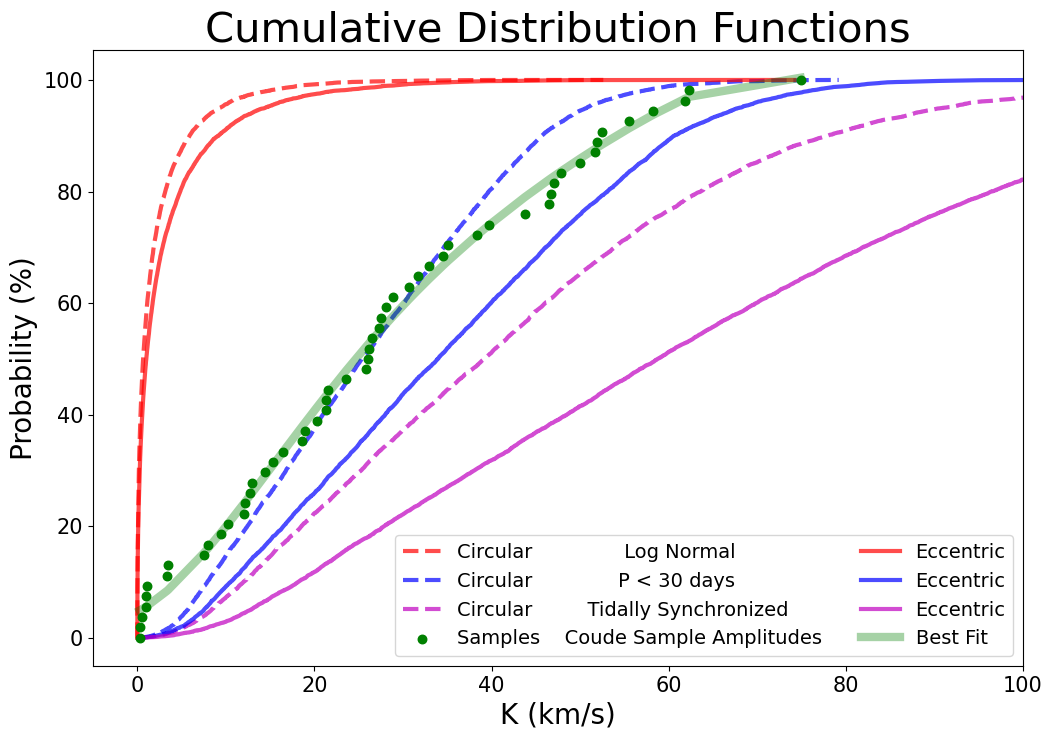

In [162]:
fig, ax = plt.subplots(figsize=(12, 8))


#ax.axhline(p[slot1-1]* 100, color = 'b', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)
#plt.axvline(data[slot1-1], color = 'b', linestyle = '--', linewidth = 1, ymin = p[slot1-1]-0.02, ymax = p[slot1-1]+0.02)
#ax.axhline(p2[slot2-1] * 100, color = 'r', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)
#plt.axvline(data2[slot2-1], color = 'r', linestyle = '--', linewidth = 1, ymin = p2[slot2-1]-0.02, ymax = p2[slot2-1]+0.02)
#ax.axhline(best_fit_line[slot3-1] * 100, color = 'g', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)
#plt.axvline(STDs[slot3-1], color = 'g', linestyle = '--', linewidth = 1, ymin = best_fit_line[slot3-1]-0.02, ymax = best_fit_line[slot3-1]+0.02)
#ax.axhline(pSSG[slot4-1] * 100, color = 'm', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)
#ax.axhline(TesspSSG[slot5-1] * 100, color = 'y', linestyle = '--', linewidth = 1, xmin = 0., xmax = 0.15)


#plt.axvline(1, color = "grey", linestyle = '--', zorder = 0, label = "1 km/s")
'''
plt.scatter(data[slot1-1], p[slot1-1]* 100, color = 'b')
plt.scatter(data2[slot2-1], p2[slot2-1]* 100, color = 'r')
plt.scatter(STDs[slot3-1], best_fit_line[slot3-1] * 100, color = 'g')'''


plt.plot(data2, p2*100, color = 'r',       label = "Circular               Log Normal", linewidth = 3, linestyle = "--", alpha = 0.7)#, Intersect: " + str(np.round(p2[slot2-1]* 100,2)) + "%", zorder = 2)
plt.plot(data, p*100, color = 'b',         label = "Circular              P < 30 days", linewidth = 3, linestyle = "--", alpha = 0.7)#, Intersect: " + str(np.round(p[slot1-1]* 100,2)) + "%", zorder = 0)
plt.plot(SSGdata, pSSG * 100, color = 'm', label = "Circular         Tidally Synchronized", linewidth = 3, linestyle = "--", alpha = 0.7)#, Intersect: " +str(np.round(pSSG[slot4-1]*100, 2)) + "%", zorder = 3)
#plt.plot(TessSSGdata, TesspSSG * 100, color = 'y', label = "Leiner 2022 SSGs (TESS), Intersect: " +str(np.round(TesspSSG[slot5-1]*100, 2)) + "%", zorder = 3)

#Full Orbit Range of known binary period distributions
#Limited Orbit Range (0-30 Days)
#Leiner 2022 SSGs (VSX)

#plt.title("Cumulative Distribution Functions, (Amplitudes)", fontsize = 15)


#plt.savefig("CDFplot2.png", dpi = 300)
#plt.savefig("Amps2.png", dpi = 300)
#plt.show()

################

#fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(STDs, p3*100, color = 'g', marker = '.', zorder = 3, s = 150, label = "Samples    Coude Sample Amplitudes")


plt.plot(data2e, p2e*100, color = 'r', label = "Eccentric", linewidth = 3, alpha = 0.7)#, Intersect: " + str(np.round(p2[slot2-1]* 100,2)) + "%", zorder = 2)
plt.plot(datae, pe*100, color = 'b',   label = "Eccentric", linewidth = 3, alpha = 0.7)#, Intersect: " + str(np.round(p[slot1-1]* 100,2)) + "%", zorder = 0)
plt.plot(SSGdatae, pSSGe * 100, color = 'm', label = "Eccentric", linewidth = 3, alpha = 0.7)#, Intersect: " +str(np.round(pSSG[slot4-1]*100, 2)) + "%", zorder = 3)
#plt.plot(TessSSGdatae, TesspSSGe * 100, color = 'y', label = "Leiner 2022 SSGs (TESS), Intersect: " +str(np.round(TesspSSG[slot5-1]*100, 2)) + "%", zorder = 3)
#plt.scatter(STDs, p3*100, color = 'g', marker = '.', label = "Coude Sample Deviations", zorder = 3)
#plt.plot(STDs, best_fit_line*100, color = 'g', linewidth = 6, alpha = 0.35)#, Intersect: " + str(np.round(best_fit_line[slot3-1] * 100, 2)) + "%", zorder = 4)

plt.plot(STDs, best_fit_line*100, color = 'g', linewidth = 6, alpha = 0.35, zorder = 3, label = "Best Fit")#, Intersect: " + str(np.round(best_fit_line[slot3-1] * 100, 2)) + "%", zorder = 4)


plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Cumulative Distribution Functions", fontsize = 30)
plt.legend(ncol = 2, fontsize = 14)
#plt.grid(True)
plt.xlim(-5, 100)
plt.xlabel("K (km/s)", fontsize = 20)
plt.ylabel("Probability (%)", fontsize = 20)
plt.savefig("CDF_Final.png", dpi = 300)
plt.show()




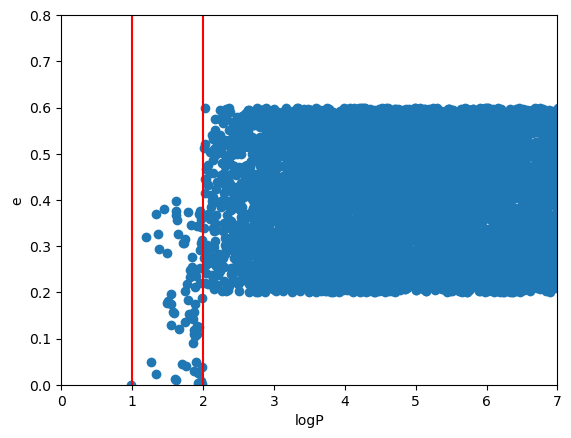

In [156]:
plt.scatter(logPfullvals, eccens)
plt.ylim(0, 0.8)
plt.xlim(0,7)
plt.xlabel('logP')
plt.ylabel('e')
plt.axvline(1, color = 'red')
plt.axvline(2, color = 'red')